Red Wine - Naive Bayes

In [ ]:
pip install pgmpy

C:\Users\KEYUR JAIN\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Naive Bayes Accuracy: 0.8000

Conditional Probability Distributions (CPDs):
CPD of alcohol:
+-----------------------------+-------------+
| alcohol(8.4)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(8.5)                | 0.000625391 |
+-----------------------------+-------------+
| alcohol(8.7)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(8.8)                | 0.00125078  |
+-----------------------------+-------------+
| alcohol(9.0)                | 0.0187617   |
+-----------------------------+-------------+
| alcohol(9.05)               | 0.000625391 |
+-----------------------------+-------------+
| alcohol(9.1)                | 0.014384    |
+-----------------------------+-------------+
| alcohol(9.2)                | 0.0450281   |
+-----------------------------+-------------+
| alcohol(9.23333333333333)   | 0.000625391 |
+-----------------------------+-------------+
| alcohol(9.25)               | 0.

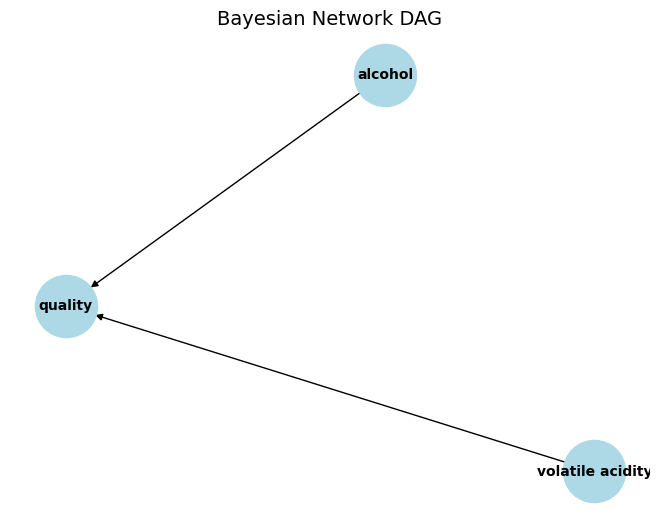

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

file_path = "winequality-red.csv"  
target_col = "quality"  # Replace 'target' (CHANGE 1)

df = pd.read_csv(file_path)
df['quality'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_col])
y = df[target_col]

impute = SimpleImputer(strategy="mean")
X = impute.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

bayes = GaussianNB()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")


# Bayesian Network
features = ['alcohol', 'volatile acidity'] #CHANGE 2
structure = [(feature, target_col) for feature in features]
naive_bayes = BayesianNetwork(structure)

naive_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

# CPDs
print("\nConditional Probability Distributions (CPDs):")
for cpd in naive_bayes.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

# Inference
infer = VariableElimination(naive_bayes)
query_result = infer.query(variables=['quality'], evidence={'volatile acidity': 0.80}) #CHANGE 3
print("\nQuery Result:")
print(query_result)

# Visualization
def plot_dag(model):
    pos = nx.spring_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title("Bayesian Network DAG", fontsize=14)
    plt.show()

dag = nx.DiGraph(naive_bayes.edges())
plot_dag(dag)
